In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
Housing = pd.read_csv("kc_house_data-1.csv")

In [3]:
Housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
Master_data = Housing

In [6]:
regex = r'^(\d{4})'
year = Housing['date'].str.extract(r'^(\d{4})', expand=False)
year.head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: date, dtype: object

In [7]:
Master_data["sold in year"] = year

In [8]:
Master_data[['bathrooms']] = Master_data[['bathrooms']].astype('int')
Master_data[['floors']] = Master_data[['floors']].astype('int')
Master_data[['sold in year']] = Master_data[['sold in year']].astype('int')

In [9]:
 Master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int32
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int32
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
sold in year     21613 non-null int32
dtypes: float64(3), int32(3), int64(15), object(

In [10]:
Master_data["age of house in years"] = Master_data["sold in year"] - Master_data["yr_built"]
Master_data["age of house in yrs after renovation"] = Master_data["sold in year"] - Master_data["yr_renovated"]


In [11]:
Master_data[['age of house in years']] = Master_data[['age of house in years']].astype('int')
Master_data[['age of house in yrs after renovation']] = Master_data[['age of house in yrs after renovation']].astype('int')

In [12]:
Master_data.loc[Master_data['age of house in yrs after renovation'] > 2000, 'age of house in yrs after renovation'] = 0

In [13]:
Master_data = Master_data.drop(['id'], axis=1)
Master_data = Master_data.drop(['date'], axis=1)
Master_data = Master_data.drop(['zipcode'], axis=1)
Master_data = Master_data.drop(['yr_built'], axis=1)
Master_data = Master_data.drop(['yr_renovated'], axis=1)
Master_data = Master_data.drop(['sold in year'], axis=1)

In [14]:
Master_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age of house in years,age of house in yrs after renovation
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59,0
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,63,23
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,49,0
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,28,0


In [15]:
Master_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age of house in years,age of house in yrs after renovation
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652,43.317818,0.779947
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631,29.375493,4.895330
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,-1.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,80.000000


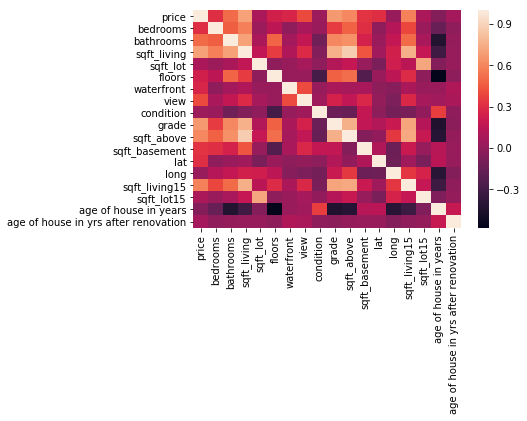

In [25]:
sns.heatmap(Master_data.corr())

In [ ]:
### Features having positive correlation have been considered for model. 
### From correlations plot it is evident that there is considerabale degree of muliticollinearit among features. 
### This multicollinearity can dealt by using PCA technique

In [ ]:
sns.pairplot(data=Master_data, hue ="price", diag_kind= "kde")
### Some problem with pair plot not displaying the figure

C:\Users\Ravichandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


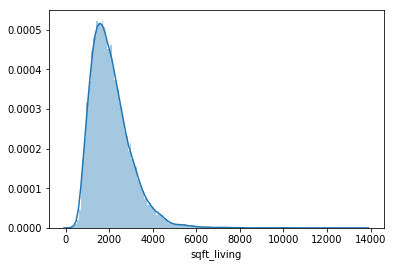

In [17]:
sns.distplot(Master_data["sqft_living"], bins = "auto")

In [ ]:
### distribution looks almost normal with slight skewness towards right side 

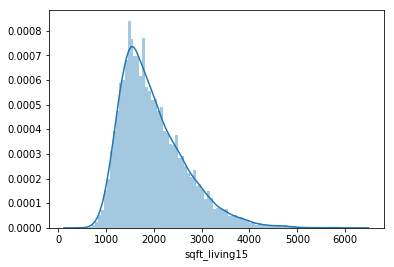

In [23]:
sns.distplot(Master_data["sqft_living15"], bins = "auto")

In [ ]:
### distribution looks almost normal with some skewness towards right side 

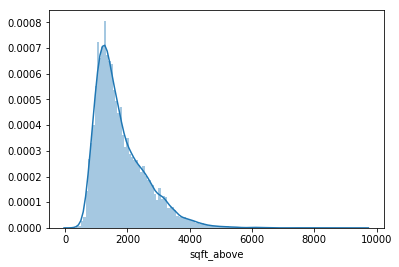

In [25]:
sns.distplot(Master_data["sqft_above"], bins = "auto")

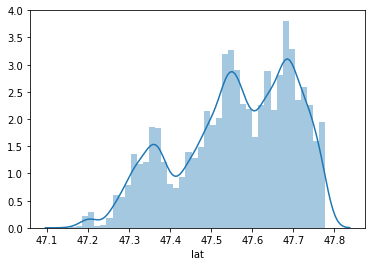

In [26]:
sns.distplot(Master_data["lat"], bins = "auto")

In [ ]:
### 3 peaks are observed (trimodel) distribution. 

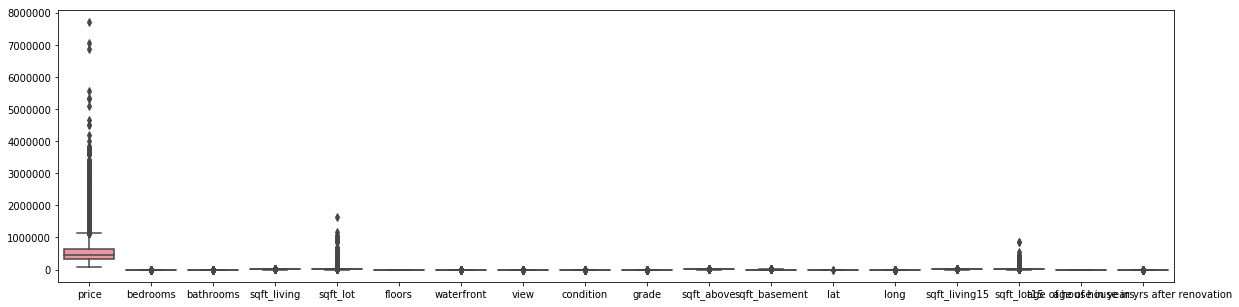

In [59]:
### visualization  using box plot###
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
sns.boxplot(data=Master_data)

In [60]:
### Using Feature Extraction method ####

Master_PCA = Master_data.drop(['price'], axis=1)
Master_PCA.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age of house in years,age of house in yrs after renovation
0,3,1,1180,5650,1,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,59,0
1,3,2,2570,7242,2,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,63,23
2,2,1,770,10000,1,0,0,3,6,770,0,47.7379,-122.233,2720,8062,82,0


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std =  sc.fit_transform(Master_PCA)          
train_cov_matrix = np.cov(Master_PCA.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[  8.65015010e-01   3.19492983e-01   4.92596040e+02   1.22132422e+03
    7.98909581e-02  -5.29667988e-04   5.66841579e-02   1.72322079e-02
    3.90253631e-01   3.67836092e+02   1.24759948e+02  -1.15096439e-03
    1.69582494e-02   2.49651804e+02   7.42644640e+02  -4.21628313e+00
   -4.37385360e-02]
 [  3.19492983e-01   5.40038449e-01   4.71021686e+02   2.59672504e+03
    1.96629915e-01   3.73835670e-03   9.98217307e-02  -6.02626217e-02
    5.24015687e-01   3.89426210e+02   8.15954760e+01   3.19241519e-03
    1.85612320e-02   2.56899057e+02   1.62084567e+03  -9.36803269e+00
    3.10352904e-02]
 [  4.92596040e+02   4.71021686e+02   8.43533681e+05   6.57468423e+06
    1.79091706e+02   8.24946062e+00   2.00314304e+02  -3.51146014e+01
    8.23407664e+02   6.66697840e+05   1.76835841e+05   6.68503480e+00
    3.10710841e+01   4.76160051e+05   4.59630222e+06  -8.59270888e+03
    8.69153316e+01]
 [  1.22132422e+03   2.59672504e+03   6.57468423e+06   1.71565877e+09
   -2.04

In [63]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ -6.57970227e-07   1.61596138e-07  -3.92021985e-04   2.82888607e-04
    3.19219627e-04   3.61804170e-04   5.17609379e-03   7.61231381e-01
   -5.91912411e-01   1.53974324e-01  -1.06207912e-01  -1.79827266e-01
    5.22422117e-02  -7.83986362e-03  -7.43430023e-04   4.67988955e-03
    1.68588460e-09]
 [ -1.40651800e-06   4.59482551e-07  -3.84855274e-04   9.58728302e-05
    2.60858205e-04  -6.09683973e-03  -7.13173440e-03   3.11323184e-02
   -1.98832704e-01   1.84315785e-01  -7.68332720e-02   8.75419647e-01
   -3.91301780e-01   3.37522677e-03   6.52367371e-03   1.35044335e-03
   -1.82268231e-08]
 [ -3.67155652e-03   2.66215095e-03  -6.74508455e-01   3.20307976e-01
    3.30280959e-01   1.06356360e-03   2.73120735e-04  -1.33197430e-04
    5.66512074e-04  -3.89185556e-04  -5.35265851e-06  -1.55837526e-04
    1.11177715e-04   7.38851634e-07  -2.89165852e-09  -3.54209969e-06
   -5.77350269e-01]
 [ -8.69620641e-01  -4.93713396e-01   2.52927730e-03   2.38984556e-04
   -7.539919

In [64]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(2177071550.9636903, array([ -6.57970227e-07,  -1.40651800e-06,  -3.67155652e-03,
        -8.69620641e-01,   1.26208984e-07,  -4.74000520e-08,
        -1.29227351e-06,   1.10411418e-07,  -3.08084570e-06,
        -3.51193217e-03,  -1.59624350e-04,   2.70559279e-07,
        -7.56817047e-07,  -2.41926602e-03,  -4.93688411e-01,
         3.86979754e-05,  -1.50428763e-06])), (284181397.26799375, array([  1.61596138e-07,   4.59482551e-07,   2.66215095e-03,
        -4.93713396e-01,  -2.50530199e-07,   8.76295805e-08,
         5.31523266e-07,   2.32786849e-07,   2.12184258e-06,
         2.50782844e-03,   1.54322508e-04,  -1.46023154e-07,
         6.69046329e-07,   3.37214954e-03,   8.69610434e-01,
        -6.23847154e-05,  -3.07765838e-07])), (1685011.3173742653, array([ -3.92021985e-04,  -3.84855274e-04,  -6.74508455e-01,
         2.52927730e-03,  -1.81388774e-04,  -6.18648825e-06,
        -1.50850218e-04,   5.12753692e-05,  -7.16244062e-04,
        -5.85357420e-01,  -8.91510348e-02,  -6.2929

In [65]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)] 
print ('Varience of eigen vector:',var_explained)

Varience of eigen vector: [0.88377672974315569, 0.11536272467488454, 0.00068402611342288926, 0.00011256176885379631, 6.3665867026498158e-05, 2.8165021771589115e-07, 9.2377446795226586e-09, 2.6353668249023938e-10, 1.9416203448136011e-10, 1.7267182095185656e-10, 1.4513943321100122e-10, 1.0035443948149344e-10, 5.4028127480395026e-11, 6.951754429085684e-12, 5.3363173437447533e-12, 2.5135471541007619e-12, 5.8389734029621778e-18]


In [66]:
cum_var_exp = np.cumsum(var_explained)
print('Cummulative varience',cum_var_exp)

Cummulative varience [ 0.88377673  0.99913945  0.99982348  0.99993604  0.99999971  0.99999999
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.        ]


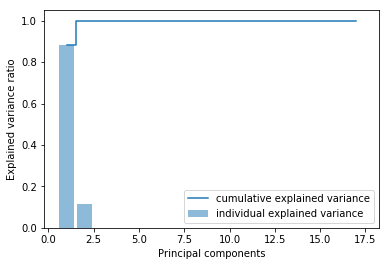

In [114]:
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [78]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2)
X_std_4D= X_reduced.fit_transform(X_train_std)

Proj_data_df = pd.DataFrame(X_std_4D)
Proj_data_df = Proj_data_df.join(pd.DataFrame(Master_data['price']))
Proj_data_df.head(5)

,0,1,price
0,-2.190254,-0.552100,221900.0
1,-0.030327,0.780925,538000.0
2,-2.566487,-0.145539,180000.0
3,-0.869032,2.091132,604000.0
4,-0.137588,-1.054646,510000.0


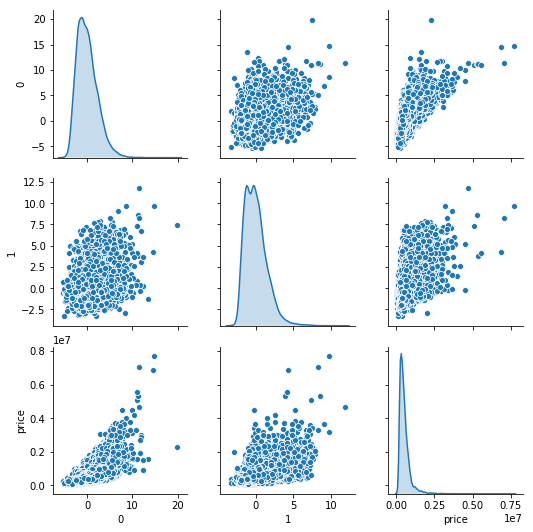

In [79]:
sns.pairplot(Proj_data_df, diag_kind='kde')

In [115]:
from sklearn.model_selection import train_test_split
array = Proj_data_df.values
X = array[:,0:2] 
y = array[:,2]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [116]:
#### Multiple linear Regression on PCA dataset ####
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [117]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 101946.84029666  100682.6238936 ]
Intercept: 538097.284642
Root mean squared error:  65670611020.4
R2 score:  0.579224218423


In [122]:
##### Using polynomial regression#####
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree= 3)
x_poly = polynomial_features.fit_transform(X_train)
x_test = polynomial_features.fit_transform(X_test)
regression_model = LinearRegression()
regression_model.fit(x_poly, y_train)
y_predicted = regression_model.predict(x_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [123]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [     0.          89044.04739135  80525.62857362  10137.70035108
   7503.0099114    4187.24584814   -645.73554684    975.51180972
    703.91559213   -917.46183901]
Intercept: 484816.422962
Root mean squared error:  54155557771.8
R2 score:  0.653005403877


In [156]:
#### Using Mulitple linear Regression on original data ####
from sklearn.model_selection import train_test_split
array = Master_data.values
X = array[:,1:] 
y = array[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [157]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [158]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ -3.05098198e+04   4.72696803e+04   1.04253302e+02   8.45079545e-02
   3.45289784e+03   5.79040129e+05   4.84567626e+04   2.95037197e+04
   9.72773482e+04   6.86134215e+01   3.56398801e+01   5.71710134e+05
  -1.03196041e+05   2.49625239e+01  -3.20650295e-01   2.50224626e+03
  -2.01671912e+02]
Intercept: -40615125.7758
Root mean squared error:  48596910039.6
R2 score:  0.688621706325


In [166]:
### K-Fold Cross-validation####
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regression_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print('R2 score: ', r2)
rmse_scores.mean()

R2 score:  0.688621706325


193771.25919962025

In [138]:
#### Feature importance using RandomForest Regression#####

from sklearn.model_selection import train_test_split
X = Master_data.iloc[:,1:] 
y = Master_data.iloc[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train) 
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [139]:
### Feature Importance ####
feature_importances

,importance
grade,0.350779
sqft_living,0.224411
lat,0.168836
long,0.070825
age of house in years,0.037533
sqft_living15,0.033066
waterfront,0.030971
sqft_above,0.024601
sqft_lot15,0.013827
sqft_lot,0.013625


In [140]:
selected_features = Master_data[['price', 'grade', 'sqft_living','lat']]

In [171]:
from sklearn.model_selection import train_test_split
X = selected_features.iloc[:,1:] 
y = selected_features.iloc[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


In [172]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [  8.45983265e+04   1.85186335e+02   6.71850187e+05]
Intercept: -32447833.5525
Root mean squared error:  64146110148.8
R2 score:  0.588992256756


In [173]:
#### K-fold cross-validation####
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regression_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print('R2 score: ', r2)
rmse_scores.mean()

R2 score:  0.588992256756


223707.6227267292

In [174]:
##### Using polynomial regression selected feature dataset#####
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X_train)
x_test = polynomial_features.fit_transform(X_test)
regression_model = LinearRegression()
regression_model.fit(x_poly, y_train)
y_predicted = regression_model.predict(x_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [175]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ -2.47174459e-02   1.76098794e+02  -1.05652694e+03   3.27145895e-01
  -2.10637160e+02  -2.52315298e+03  -2.34679978e+02  -6.18307755e+02
  -1.90001345e+04   1.48323647e+01  -1.46937406e+03  -2.38414698e+02
  -4.82396977e+03  -2.08518084e+00   4.01941135e+02  -5.02635680e+03
   2.07495485e-03   2.59691836e+01   7.77348134e+02   7.18123005e+02
   3.46067418e+02  -5.16256920e-01  -1.44386656e+02  -6.60549187e-04
   5.24147848e+00   1.35234826e+02   1.94694110e-06   4.38118396e-02
  -7.34635219e+00   1.02794394e+02  -6.27359249e-10  -4.37932720e-05
  -2.72665061e-01  -7.93533167e+00  -1.35811170e+01]
Intercept: -7043128.85879
Root mean squared error:  45427119460.3
R2 score:  0.708931721532


In [176]:
#### K-fold cross-validation####
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regression_model, x_poly, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print('R2 score: ', r2)
rmse_scores.mean()

R2 score:  0.708931721532


203361.16577243234

In [178]:
#### Ridge Regression #####
from sklearn.linear_model import Ridge

array = Master_data.values
X = array[:,1:] 
y = array[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
              

In [182]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.700795660351
linear regression test score: 0.688621706325
ridge regression train score low alpha: 0.700795660098
ridge regression test score low alpha: 0.688621615258
ridge regression train score high alpha: 0.692900741112
ridge regression test score high alpha: 0.682539196641


In [183]:
from sklearn.linear_model import Lasso

array = Master_data.values
X = array[:,1:] 
y = array[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [184]:
#### Lasso Regression ####
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

C:\Users\Ravichandra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


training score: 0.700795658203
test score:  0.68862102461
number of features used:  17


C:\Users\Ravichandra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


training score for alpha=0.01: 0.700795660351
test score for alpha =0.01:  0.688621699524
number of features used: for alpha =0.01: 17
training score for alpha=0.0001: 0.700795660351
test score for alpha =0.0001:  0.688621706257
number of features used: for alpha =0.0001: 17
LR training score: 0.700795660351
LR test score:  0.688621706325


C:\Users\Ravichandra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
### polynomial regression gives better result in comparision with other models ###